In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Bu proje, AYGAZ YAPAY ZEKAYA GİRİŞ BOOTCAMP süreci için hazırlanmıştır. Proje kapsamında, yapay zeka ve makine öğrenmesi tekniklerini kullanarak Fashion MNIST veri seti üzerinde çeşitli analizler ve modelleme çalışmaları yapılacaktır. İlk adım olarak, veri setinin yüklenmesi gerekmektedir. Bunun için TensorFlow kütüphanesinin Keras API'si kullanılarak Fashion MNIST veri seti yüklenir.

Bu adım, projenin geri kalanında kullanılacak olan veri setine erişimi sağlar ve TensorFlow kütüphanesinin fonksiyonlarını kullanmamıza imkan tanır. Bu sayede, veri setini yükleyebilir, ön işleme tabi tutabilir ve modellerimizi eğitebiliriz.

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# **Veri Setini Yükleme**

Bu kod satırı, TensorFlow kütüphanesinin Keras API'sini kullanarak Fashion MNIST veri setini yükler. Fashion MNIST, giysi ve aksesuarların siyah beyaz görüntülerini içeren, toplamda 70.000 adet örnekten oluşan bir veri setidir. Bu veri seti, 60.000 eğitim örneği ve 10.000 test örneği içerir ve her görüntü 28x28 piksel boyutundadır. Her bir görüntü, 10 farklı kategoriye (örneğin, tişört, ayakkabı, çanta vb.) aittir.

Veri setinin yüklenmesi, veri ile çalışmaya başlamak için gereklidir ve bu adımda tf.keras.datasets.fashion_mnist.load_data() fonksiyonu kullanılarak veri seti belleğe yüklenir. Bu fonksiyon, eğitim ve test veri setlerini ayrı ayrı döner ve bu veri setleri üzerinde çeşitli ön işleme adımları, model eğitimi ve değerlendirme işlemleri gerçekleştirilebilir.

In [5]:
tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

Bu satır, daha önce içeri aktardığımız fashion_mnist veri setini yükler. load_data() fonksiyonu, eğitim ve test verilerini ve bunlara ait etiketleri döner.

**X_train:** Eğitim görüntülerini içerir.

**y_train:** Eğitim görüntülerinin etiketlerini içerir.

**X_test:** Test görüntülerini içerir.

**y_test:** Test görüntülerinin etiketlerini içerir.

In [6]:
# Veri setini yükleyin
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# **Veri Hakkında Bilgi Yazdırma**

Bu kod bloğu, eğitim ve test veri setlerinin boyutlarını yazdırır.

**X_train.shape:** Eğitim veri setindeki görüntülerin boyutlarını (adet, yükseklik, genişlik) döner. Bu, genellikle (60000, 28, 28) şeklindedir, yani 60.000 adet 28x28 piksel görüntü içerir.

**y_train.shape:** Eğitim veri setindeki etiketlerin boyutlarını döner. Bu, genellikle (60000,) şeklindedir, yani 60.000 etiket içerir.

**X_test.shape:** Test veri setindeki görüntülerin boyutlarını döner. Bu, genellikle (10000, 28, 28) şeklindedir, yani 10.000 adet 28x28 piksel görüntü içerir.

**y_test.shape:** Test veri setindeki etiketlerin boyutlarını döner. Bu, genellikle (10000,) şeklindedir, yani 10.000 etiket içerir.

Bu bilgiler, veri setinin boyutları ve yapısı hakkında hızlı bir özet sağlar ve veri ile çalışmaya başlamadan önce faydalı bir kontrol noktası olarak kullanılabilir.

In [7]:
# Veri hakkında bazı bilgileri yazdırın
print(f"Train data shape: {X_train.shape}, Train labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}, Test labels shape: {y_test.shape}")

Train data shape: (60000, 28, 28), Train labels shape: (60000,)
Test data shape: (10000, 28, 28), Test labels shape: (10000,)


# **İlk 10 Görüntüyü Görselleştirme**

Bu kod bloğu, eğitim veri setindeki ilk 10 görüntüyü görselleştirir ve her bir görüntünün etiketiyle birlikte gösterir.

* **Döngü:** for i in range(10) ifadesi, 0'dan 9'a kadar (toplam 10 adet) olan görüntüleri döngü ile iteratif olarak işler.

* **Alt Grafikler Oluşturma:** plt.subplot(2, 5, i+1) ifadesi, 2 satır ve 5 sütundan oluşan bir ızgara düzeninde her bir görüntüyü yerleştirir. i+1, her bir görüntünün doğru alt grafiğe yerleştirilmesini sağlar.

* **Görüntü Gösterme:** plt.imshow(X_train[i], cmap='gray') ifadesi, X_train eğitim veri setindeki i numaralı görüntüyü gri tonlamalı olarak gösterir. cmap='gray', görüntülerin gri tonlamalı olarak gösterilmesini sağlar.

* **Başlık Ekleme:** plt.title(f"Label: {y_train[i]}") ifadesi, her bir görüntünün üzerine, o görüntünün etiketini (y_train[i]) başlık olarak ekler.

* **Eksenleri Gizleme:** plt.axis('off') ifadesi, görüntülerin etrafındaki eksenleri gizler, böylece görüntülerin daha net ve okunaklı görünmesini sağlar.

* **Grafikleri Gösterme:** plt.show() ifadesi, tüm oluşturulan grafikleri ekranda gösterir.

Bu adımlar, eğitim veri setindeki ilk 10 görüntünün hızlı bir şekilde görselleştirilmesini sağlar ve veri setindeki örneklerin nasıl göründüğünü anlamak için faydalıdır.

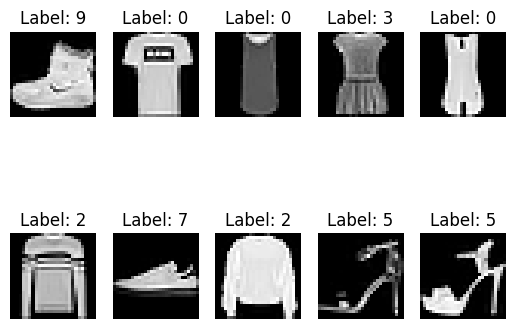

In [8]:
import matplotlib.pyplot as plt

# İlk 10 görüntüyü görselleştirme
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

# **Normalize Etme**

Veri setinde yer alan görüntüler, her piksel için 0 ile 255 arasında değişen yoğunluk değerlerine sahiptir. Bu değerler, piksellerin parlaklık seviyelerini temsil eder. Makine öğrenmesi ve özellikle derin öğrenme modellerinde, bu tür büyük aralıkta değişen verilerin normalizasyonu, modelin performansını ve öğrenme hızını artırabilir. Normalizasyon, verilerin belirli bir aralığa (genellikle 0 ile 1 arası) ölçeklenmesi işlemidir.

**X_train ve X_test:** Bu değişkenler sırasıyla eğitim ve test veri setlerindeki görüntüleri içerir.

**/255.0:** Her bir piksel değeri 255'e bölünerek 0-1 aralığına getirilir. Örneğin, orijinal değeri 0 olan bir piksel, 0/255 = 0 olarak kalırken, orijinal değeri 255 olan bir piksel, 255/255 = 1 olur. Böylece tüm piksel değerleri 0 ile 1 arasında normalize edilir.

**Neden Normalize Edilir?**

1. Hızlı ve Etkili Öğrenme: Normalizasyon, modelin daha hızlı ve etkili bir şekilde öğrenmesini sağlar. Büyük değerler, gradient descent gibi optimizasyon algoritmalarının yavaşlamasına neden olabilir.

2. Kararlı Hesaplama: Normalizasyon, sayısal kararlılığı artırarak sayısal taşma ve alt taşıma hatalarını önler.

3. Genelleme Yeteneği: Normalize edilmiş verilerle eğitilen modeller, genellikle daha iyi genelleme yeteneğine sahip olur ve yeni veriler üzerinde daha iyi performans gösterir.

Bu adım, veri ön işleme sürecinin önemli bir parçasıdır ve modelin performansını optimize etmek için gereklidir.

In [9]:
# Normalize etme (0-255 aralığındaki değerleri 0-1 aralığına getirme)
X_train = X_train / 255.0
X_test = X_test / 255.0

# **K-Nearest Neighbors (KNN)**

K-Nearest Neighbors (KNN), gözetimli öğrenme yöntemlerinden biridir ve sınıflandırma ile regresyon problemlerinde kullanılır. KNN algoritması, sınıflandırma işlemi için veri noktalarının en yakın komşularını (K komşu) dikkate alarak karar verir. Basit ve etkili bir algoritma olan KNN, özellikle küçük veri setlerinde ve özellik uzayı düşük olan problemler için uygundur. Ancak, büyük veri setlerinde ve yüksek boyutlu veri setlerinde hesaplama maliyeti yüksek olabilir.

KNN algoritmasının temel prensibi, bir veri noktasının sınıfını tahmin etmek için bu noktaya en yakın K adet komşunun sınıflarına bakmak ve çoğunluk olan sınıfı seçmektir. Komşuluk ilişkileri genellikle Euclidean mesafesi kullanılarak hesaplanır, ancak başka mesafe metrikleri de kullanılabilir.

**1.Verileri yeniden şekillendirme**

Görüntü verilerini tek boyutlu vektörler haline getiririz. Fashion MNIST veri setindeki her bir görüntü, 28x28 piksel boyutundadır. Bu işlem, her bir görüntüyü 784 (28*28) elemanlı bir vektöre dönüştürür.

**2.KNN modeli oluşturma**

KNeighborsClassifier(n_neighbors=3): 3 komşulu KNN sınıflandırıcısını oluştururuz. n_neighbors parametresi, sınıflandırmada kullanılacak komşu sayısını belirtir. Bu örnekte, sınıflandırma yaparken her veri noktasının en yakın 3 komşusu dikkate alınır.

**3.Modeli eğitme**

fit(X_train_reshaped, y_train): Modeli eğitim verileri üzerinde eğitiriz. Bu adım, KNN algoritmasının eğitim verilerini kullanarak komşuluk ilişkilerini öğrenmesini sağlar.

**4.Tahmin yapma**

predict(X_test_reshaped): Test veri setindeki her bir örnek için modelin sınıf tahminlerini yapar. Bu adım, test verileri üzerinde modelin performansını değerlendirmemize olanak tanır.

Bu adımlar, KNN sınıflandırma modelinin oluşturulması, eğitilmesi ve test edilmesi sürecini kapsamaktadır. Modelin performansını değerlendirmek için çeşitli metrikler kullanarak sonuçları analiz etmek bir sonraki adım olacaktır.



In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import numpy as np

# 1.Verileri yeniden şekillendirme
X_train_reshaped = X_train.reshape(-1, 28*28)
X_test_reshaped = X_test.reshape(-1, 28*28)

# 2.KNN modeli oluşturma
knn = KNeighborsClassifier(n_neighbors=3)

# 3.Modeli eğitme
knn.fit(X_train_reshaped, y_train)

# 4.Tahmin yapma
y_pred_knn = knn.predict(X_test_reshaped)

# **Değerlendirme Metrikleri**

**accuracy_score:** Modelin doğruluğunu ölçer. Doğruluk, doğru tahminlerin toplam tahminlere oranıdır.

**precision_score:** Modelin hassasiyetini ölçer. Hassasiyet, doğru pozitif tahminlerin toplam pozitif tahminlere oranıdır.

**recall_score:** Modelin geri çağırma oranını ölçer. Geri çağırma, doğru pozitif tahminlerin toplam gerçek pozitiflere oranıdır.

**f1_score:** F1 skoru, precision ve recall değerlerinin harmonik ortalamasıdır. Genel performansı ölçmede kullanılır.

Bu metrikler, sınıflandırma modelinin farklı açılardan performansını değerlendirmek için kullanılır.

**ROC ve AUC**

* predict_proba: Modelin her sınıf için olasılık tahminlerini döner.

* roc_auc_score: ROC eğrisi altındaki alanı (AUC) hesaplar. AUC, modelin genel ayırt ediciliğini ölçer. multi_class='ovr', her sınıfa karşı diğer sınıflar için ROC eğrisi hesaplamasını ifade eder.

**ROC Eğrisi**

* roc_curve: ROC eğrisi için yanlış pozitif oran (FPR) ve doğru pozitif oran (TPR) hesaplar.

* ROC eğrisi, modelin farklı sınıf eşikleri için performansını görselleştirir. Eğri altındaki alan ne kadar büyükse, modelin ayırt ediciliği o kadar iyidir.

Bu adımlar, modelin performansını kapsamlı bir şekilde değerlendirmenizi sağlar ve sonuçları görsel olarak analiz etmenize olanak tanır.

Accuracy: 0.8541
Precision: 0.8575414622679564
Recall: 0.8541000000000001
F1-Score: 0.8539002124666112
AUC: 0.9583711777777777


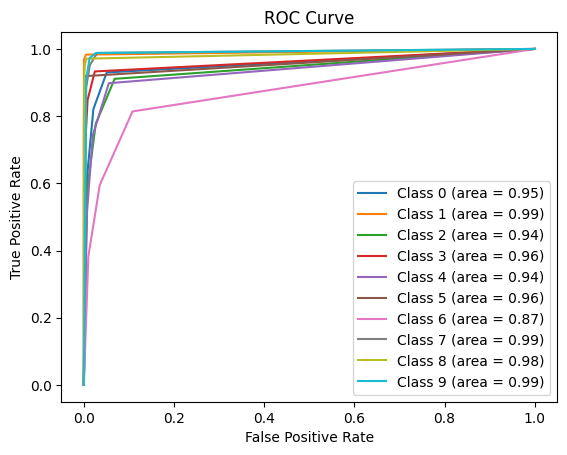

In [11]:
# Değerlendirme metrikleri
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn, average='macro')
recall = recall_score(y_test, y_pred_knn, average='macro')
f1 = f1_score(y_test, y_pred_knn, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# ROC ve AUC
y_prob_knn = knn.predict_proba(X_test_reshaped)
roc_auc = roc_auc_score(y_test, y_prob_knn, multi_class='ovr')
print(f"AUC: {roc_auc}")

# ROC Eğrisi
fpr = {}
tpr = {}
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_prob_knn[:, i], pos_label=i)

for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc_score(y_test==i, y_prob_knn[:, i]):.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# **SVM (Support Vector Machine) Modeli**

Support Vector Machine (SVM), hem sınıflandırma hem de regresyon problemlerinde kullanılan güçlü bir gözetimli öğrenme algoritmasıdır. SVM, veri noktalarını, iki sınıfı en iyi şekilde ayıran bir hiper düzlem bulmaya çalışır. Bu hiper düzlem, maksimum marjin (veri noktalarından en uzak mesafe) ile tanımlanır. SVM, doğrusal ve doğrusal olmayan veriler için uygundur ve kernel hileleri kullanarak doğrusal olmayan sınıflandırma yapabilir.

**Verilerin Yeniden Şekillendirilmesi**

Görüntü verilerini tek boyutlu vektörler haline getiririz. Fashion MNIST veri setindeki her bir görüntü, 28x28 piksel boyutundadır. Bu işlem, her bir görüntüyü 784 (28*28) elemanlı bir vektöre dönüştürür.

**1.SVM Modeli Oluşturma**

* SVC(kernel='linear'): Doğrusal bir çekirdek (kernel) kullanarak SVM sınıflandırıcısını oluştururuz. kernel parametresi, sınıflandırma için kullanılacak çekirdek fonksiyonunu belirtir. Doğrusal çekirdek, veriyi doğrusal olarak ayırmaya çalışır.

* probability=True: Olasılık tahminlerini etkinleştirir. Bu, modelin predict_proba yöntemi ile sınıf olasılıklarını döndürebileceği anlamına gelir.

**2.Modeli Eğitme**

fit(X_train_reshaped, y_train): Modeli eğitim verileri üzerinde eğitiriz. Bu adım, SVM algoritmasının eğitim verilerini kullanarak hiper düzlemi öğrenmesini sağlar.

**3.Tahmin Yapma**

predict(X_test_reshaped): Test veri setindeki her bir örnek için modelin sınıf tahminlerini yapar. Bu adım, test verileri üzerinde modelin performansını değerlendirmemize olanak tanır.

Bu adımlar, temel bir SVM sınıflandırma modelinin oluşturulması, eğitilmesi ve test edilmesi sürecini kapsamaktadır. Modelin performansını değerlendirmek için çeşitli metrikler kullanarak sonuçları analiz etmek bir sonraki adım olacaktır.

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Veri setini yükleyin ve normalize edin
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train_reshaped = X_train.reshape(-1, 28*28)
X_test_reshaped = X_test.reshape(-1, 28*28)

# SVM modeli oluşturma
svm_model = SVC(kernel='linear', probability=True)

# Modeli eğitme
svm_model.fit(X_train_reshaped, y_train)

# Tahmin yapma
y_pred_svm = svm_model.predict(X_test_reshaped)

# Değerlendirme metrikleri
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm, average='macro')
recall = recall_score(y_test, y_pred_svm, average='macro')
f1 = f1_score(y_test, y_pred_svm, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# ROC ve AUC
y_prob_svm = svm_model.predict_proba(X_test_reshaped)
roc_auc = roc_auc_score(y_test, y_prob_svm, multi_class='ovr')
print(f"AUC: {roc_auc}")

# ROC Eğrisi
fpr = {}
tpr = {}
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_prob_svm[:, i], pos_label=i)

for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc_score(y_test==i, y_prob_svm[:, i]):.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# **Convolutional Neural Network (CNN)**

Convolutional Neural Networks (CNN'ler), görüntü verileri ve diğer 2D veri yapıları üzerinde çalışan derin öğrenme algoritmalarıdır. CNN'ler, özellikle görüntü tanıma, nesne tespiti ve diğer görsel veri işleme görevlerinde başarılıdır. CNN'lerin temel yapı taşları şunlardır:

1. **Convolutional Layers (Evrişim Katmanları):** Bu katmanlar, görüntüden özellik çıkarır. Evrişim işlemi, görüntü üzerindeki küçük bölgeler (filtreler veya çekirdekler) üzerinden geçer ve her bölgede belirli özellikleri algılar. Bu katmanlar, görüntüdeki kenarlar, köşeler ve diğer basit yapıları öğrenir.

2. **Pooling Layers (Havuzlama Katmanları):** Bu katmanlar, özellik haritalarını azaltarak işlem verimliliğini artırır ve modelin genelleme yeteneğini artırır. En yaygın kullanılan havuzlama yöntemi MaxPooling'dir, bu yöntem her bölgedeki en yüksek değeri seçer.

3. **Flatten Layers (Düzleştirme Katmanları):** Bu katmanlar, 2D özellik haritalarını tek boyutlu vektörlere dönüştürür, bu da verinin tam bağlantılı katmanlara beslenmesine olanak tanır.

4. **Dense Layers (Tam Bağlantılı Katmanlar):** Bu katmanlar, sinir ağının tam bağlantılı kısmıdır ve sınıflandırma işlemini gerçekleştirir. Son katman genellikle softmax aktivasyon fonksiyonu kullanarak her sınıf için olasılık dağılımı sağlar.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# CNN modeli oluşturma
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Modeli derleme
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Modeli eğitme
history = cnn_model.fit(X_train[..., np.newaxis], y_train, epochs=10, validation_data=(X_test[..., np.newaxis], y_test))

# Tahmin yapma
y_pred_cnn = cnn_model.predict(X_test[..., np.newaxis])
y_pred_cnn_classes = np.argmax(y_pred_cnn, axis=1)

# Değerlendirme metrikleri
accuracy = accuracy_score(y_test, y_pred_cnn_classes)
precision = precision_score(y_test, y_pred_cnn_classes, average='macro')
recall = recall_score(y_test, y_pred_cnn_classes, average='macro')
f1 = f1_score(y_test, y_pred_cnn_classes, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# ROC ve AUC
roc_auc = roc_auc_score(y_test, y_pred_cnn, multi_class='ovr')
print(f"AUC: {roc_auc}")

# ROC Eğrisi
fpr = {}
tpr = {}
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_cnn[:, i], pos_label=i)

for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc_score(y_test==i, y_pred_cnn[:, i]):.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# **Yapay Sinir Ağları (YSA)**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt

# Veri setini yükleyin ve normalize edin
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0

# YSA modeli oluşturma
ysa_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Modeli derleme
ysa_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Modeli eğitme
ysa_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Tahmin yapma
y_pred_ysa = ysa_model.predict(X_test)
y_pred_ysa_classes = np.argmax(y_pred_ysa, axis=1)

# Değerlendirme metrikleri
accuracy = accuracy_score(y_test, y_pred_ysa_classes)
precision = precision_score(y_test, y_pred_ysa_classes, average='macro')
recall = recall_score(y_test, y_pred_ysa_classes, average='macro')
f1 = f1_score(y_test, y_pred_ysa_classes, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# ROC ve AUC
roc_auc = roc_auc_score(y_test, y_pred_ysa, multi_class='ovr')
print(f"AUC: {roc_auc}")

# ROC Eğrisi
fpr = {}
tpr = {}
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_ysa[:, i], pos_label=i)

for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc_score(y_test==i, y_pred_ysa[:, i]):.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()